In [3]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()
%matplotlib inline

In [4]:
df = pd.read_csv('911.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [6]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [134]:
#top 5 zipcodes

#value counts - unique values for data frame column
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [5]:
#top 5 townships

df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [136]:
#number of unique titles
df['title'].nunique()

110

In [18]:
#new column for simplified call reasons

#apply the lambda function to title column
#split the string at the colon and grab the first item
#does for each data item in title

df['reason'] = df['title'].apply(lambda x: x.split(':')[0])
df['reason']

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: reason, Length: 99492, dtype: object

In [138]:
#most common reason
df['reason'].value_counts().head()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

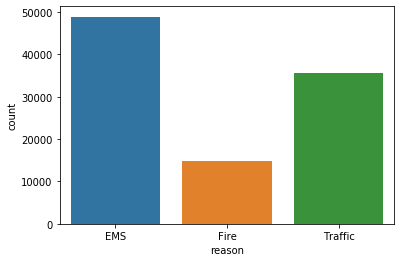

In [20]:
countP = sns.countplot(x=df['reason'],data=df)

In [30]:
#gets the type of the first timeStamp data object

type(df['timeStamp'].iloc[0])

str

In [39]:
#set new column to the column with function applied
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
time = df['timeStamp'].iloc[0]
time

Timestamp('2015-12-10 17:40:00')

In [49]:
df['hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['month'] = df['timeStamp'].apply(lambda x: x.month)
df['dayofweek'] = df['timeStamp'].apply(lambda x: x.dayofweek)

In [53]:
#use map function to map (perform batch fct) to this column
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['dayofweek'] = df['dayofweek'].map(dmap)

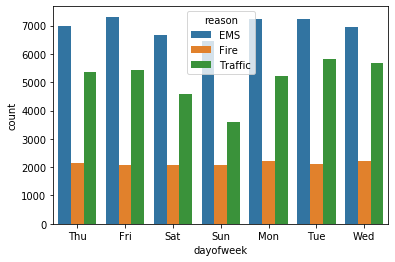

In [54]:
#count plot with day of week as x variable, separated by reason

countP = sns.countplot(x=df['dayofweek'],hue='reason',data=df)

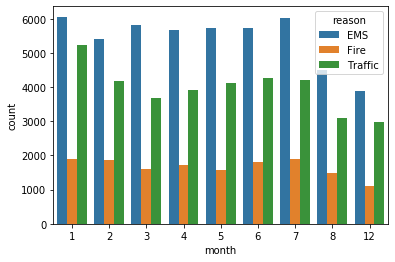

In [55]:
countP = sns.countplot(x=df['month'],hue='reason',data=df)

In [75]:
#groupby object
#count should be applied to bymonth to make object set to count of each variable for each month

bymonth = df.groupby("month").count()
bymonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,dayofweek
month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


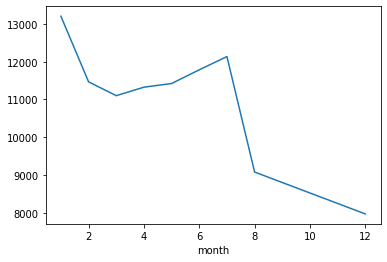

In [79]:
#count makes categorical data just be the total instances
#simple plot of one of these columns to get count of calls per month

bymonth['lat'].plot()

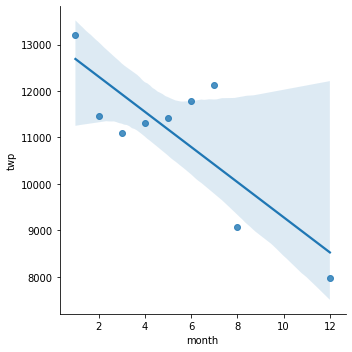

In [91]:
#makes lmplot using data with month as a data column
#month was the index previously but this allows us to use the data

sns.lmplot(x='month', y='twp', data=bymonth.reset_index())

In [98]:
#create new column in original dataframe
df['date'] = df['timeStamp'].apply(lambda x: x.date())

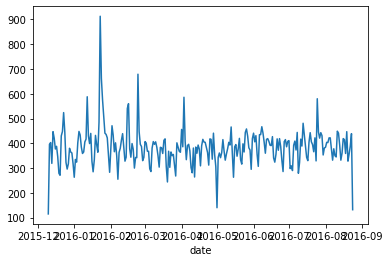

In [101]:
#create groupby object by date, get counts of each var for each month and year
#make plot from one categorical variable thats summed up for total calls

bydate = df.groupby("date").count()

bydate['lat'].plot()

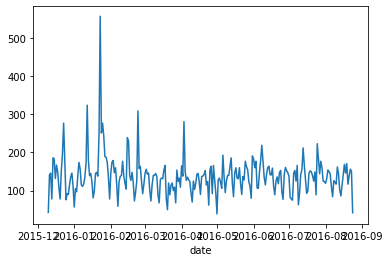

In [103]:
#plot the data frame with reason as traffic, grouped by date, count of calls

df[df['reason']=='Traffic'].groupby('date').count()['lat'].plot()

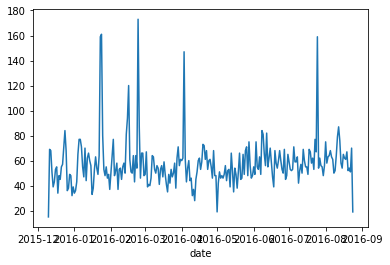

In [104]:
df[df['reason']=='Fire'].groupby('date').count()['lat'].plot()

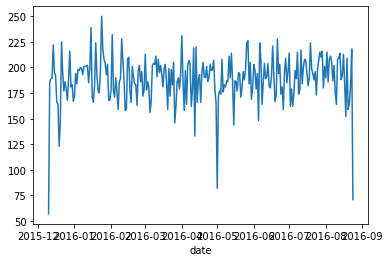

In [109]:
df[df['reason']=='EMS'].groupby('date').count()['lat'].plot()

In [122]:
#needs to be in matrix form -- each cell data references row and column
#group data frame by day of week and hour based on categorical var (count of calls)
#unstack makes the hours a top level row/index and the day of week the column/index

heatdata = df.groupby(by=['dayofweek', 'hour']).count()['lat'].unstack()
heatdata

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
dayofweek,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


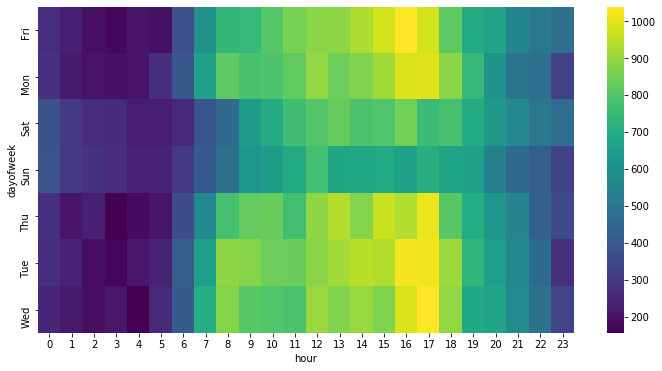

In [119]:
plt.figure(figsize=(12,6)) #makes graph bigger
sns.heatmap(heatdata,cmap='viridis') #create heatmap with matrix data grouped by day of week and hour

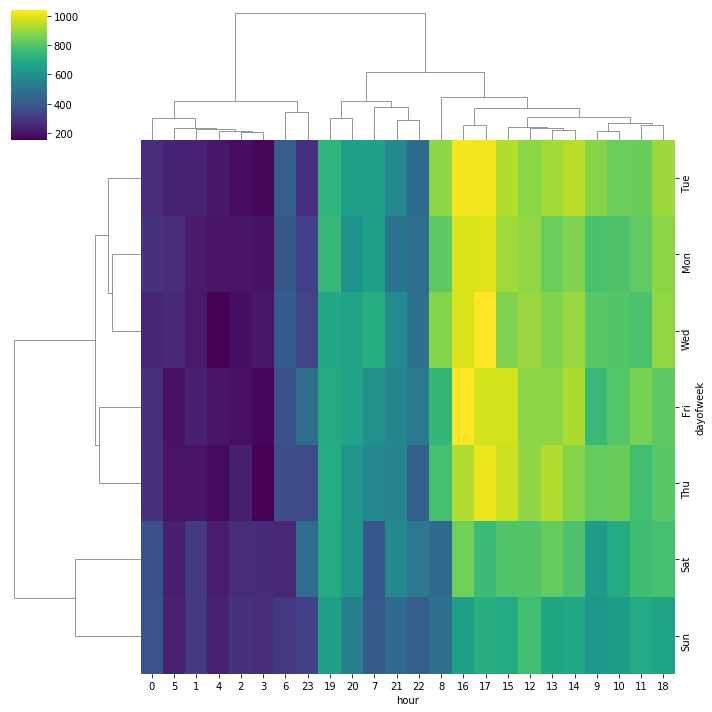

In [121]:
sns.clustermap(heatdata, cmap='viridis')

In [207]:
monthdata = df.groupby(by=['dayofweek', 'month']).count()['lat'].unstack()
monthdata

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


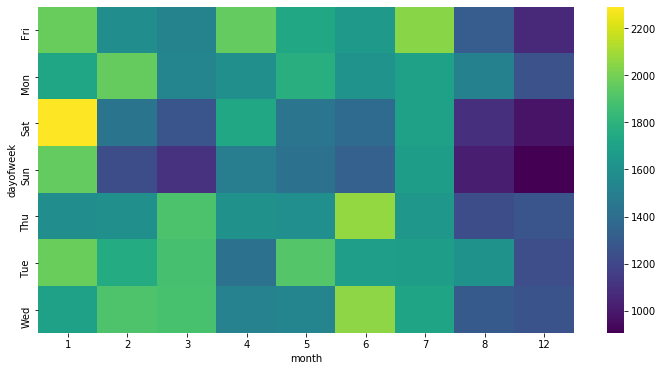

In [125]:
plt.figure(figsize=(12,6)) #makes graph bigger
sns.heatmap(monthdata,cmap='viridis') #heatmap of matrix data grouped by 

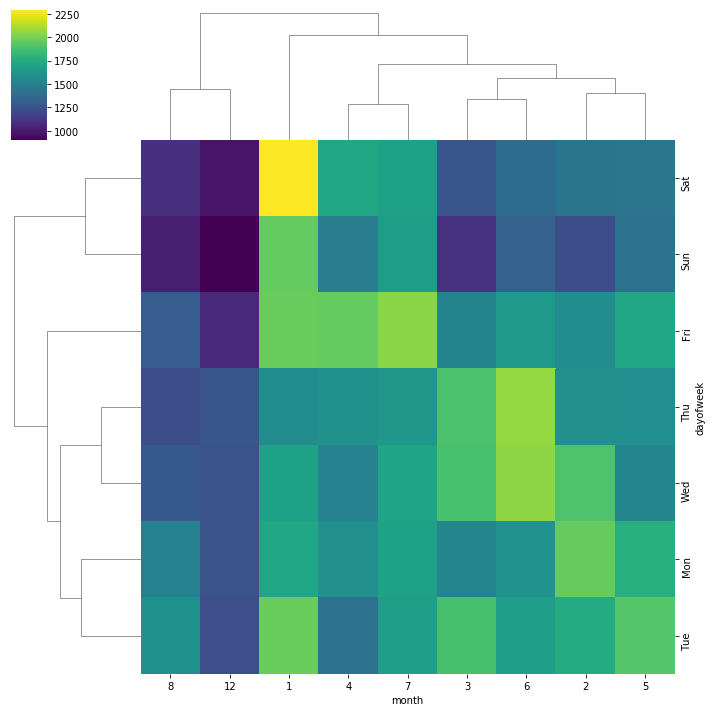

In [126]:
sns.clustermap(monthdata, cmap='viridis')